In [224]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

class RamanSpectra(object):

    def __init__(self, pathFile, upLevels = 0):
        self.pathFile = pathFile
        self.readFromLocation(pathFile, upLevels)
        # After this execution the object has the following properties
        # self ... content, info, spx, spy
        return;
    
    def __str__(self):
        return 'raman_s at +++ ' + self.pathFile;

    def __repr__(self):
        return 'raman_s at ... ' + self.pathFile;
    
    def readFromLocation(self, pathFile, upLevels):
        count = 0
        initialPath = os.getcwd().split('/')[1:]
        # TODO: Raise error when upLevels > treeDepth
        while count  < upLevels:
            initialPath.pop()
            count +=1
        docLoc = '/'+ '/'.join(initialPath)+pathFile

        with open(docLoc, 'r', encoding = 'unicode_escape') as tempfile:
                self.content = tempfile.read()
                self.dets    = self.content.split('#Acquired')[0]
                self.info    = self.content.split('#Acquired')[1].split('\n')[0].replace("=\t",'')
                _values  = self.content.split('#Acquired')[1].split('\n')[1:-1]
                self.spx=[]
                self.spy=[]
                for values in _values:
                    try:
                        x = float(values.split('\t')[0])
                        y = float(values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    self.spx.append(x)
                    self.spy.append(y)
        return;
    
    
    def plot(self, darkMode=True):
        if darkMode:
            with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 'axes.facecolor':'1D0B3A'}):
                fig, ax = plt.subplots()
                ax.plot(self.spx, self.spy)
                ax.set_title(self.info)
        else:
            fig, ax = plt.subplots()
            ax.plot(self.spx, self.spy)
            ax.set_title(self.info)
    
    def altPlot(self,xinit = 0, yinit = 0, xlim = 6001, ylim = 4001, plotSize = (16,8), xMstep=500,xmstep=100,yMstep=500,ymstep=100):
        with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
            fig, ax = plt.subplots()
            fig.set_size_inches(plotSize[0],plotSize[1])

            ss = self.dets.replace(' ','').replace('\t','').split('\n')
            
            p1, q1, text1 = -800, 2800, ss[0]
            p2, q2, text2 = -800, 2400, ss[1]
            p3, q3, text3 = -800, 2000, ss[2]
            p4, q4, text4 = -800, 1600, ss[16]
            p5, q5, text5 = -800, 1200, ss[17]
            p6, q6, text6 = -800, 800,  ss[18]
            p7, q7, text7 = -800, 400,  ss[19]
            p8, q8, text8 = -800, 0, self.info
            
            ax.text(p1, q1, text1)
            ax.text(p2, q2, text2)
            ax.text(p3, q3, text3)
            ax.text(p4, q4, text4)
            ax.text(p5, q5, text5)
            ax.text(p6, q6, text6)
            ax.text(p7, q7, text7)
            ax.text(p8, q8, text8)

            ax.plot(self.spx, self.spy, color = 'black', linewidth = 0.3)
            plt.fill_between(self.spx,self.spy, color='b', alpha=0.4)
            plt.ylim([yinit, ylim])
            plt.xlim([xinit, xlim])
            plt.xlabel(r'$Raman \: Shift (cm^{-1})$', fontsize=20)
            plt.ylabel(r'$Intensity \: (A.U.)$', fontsize=20)

            ax.set_title(self.info)
            
            major_ticks = np.arange(xinit, xlim, xMstep)
            minor_ticks = np.arange(xinit, xlim, xmstep)

            ymajor_ticks = np.arange(yinit, ylim, yMstep)
            yminor_ticks = np.arange(yinit, ylim, ymstep)

            ax.set_yticks(ymajor_ticks)
            ax.set_yticks(yminor_ticks, minor=True)

            ax.set_xticks(major_ticks)
            ax.set_xticks(minor_ticks, minor=True)
            
            # Or if you want different settings for the grids:
            ax.grid(which='minor', alpha=0.4)
            ax.grid(which='major', alpha=0.8)
            plt.savefig('test.jpeg',dpi=900)
            plt.subplots_adjust()

In [225]:
p = RamanSpectra('/PR6S1E_01.txt')

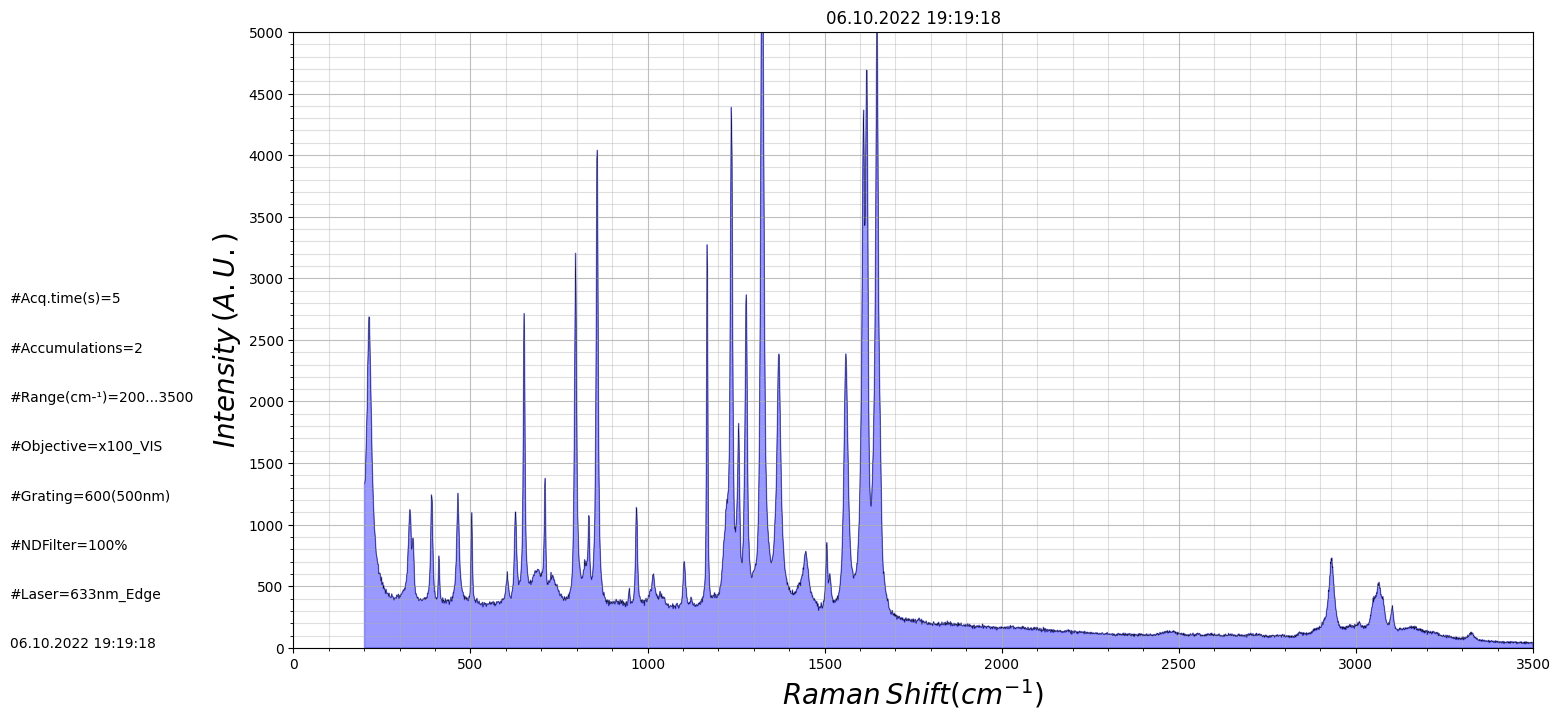

In [228]:
p.altPlot(xinit=0,xlim=3501,ylim=5001)

In [87]:
s = RamanSpectra('/BaseLine/fil.txt',upLevels=1)

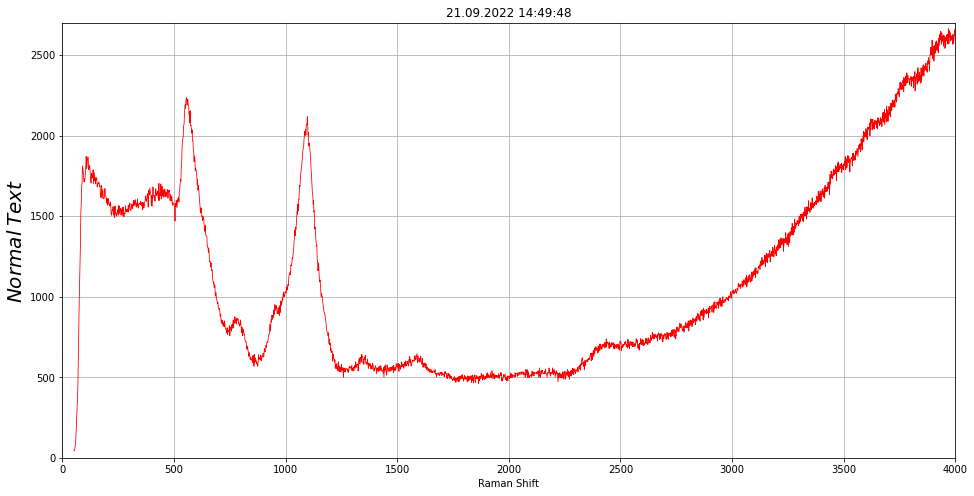

In [3]:
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
    fig, ax = plt.subplots()
    fig.set_size_inches(16,8)
    ax.plot(s.spx, s.spy,color = 'red', linewidth = 0.8)
    plt.ylim([0, 2700])
    plt.xlim([0, 4000])
    plt.xlabel('Raman Shift')
    plt.ylabel(r'$Normal \: Text$', fontsize=20)
    ax.set_title(s.info)
    ax.grid(axis='both', which='both')
    plt.savefig('test.jpeg',dpi=900)

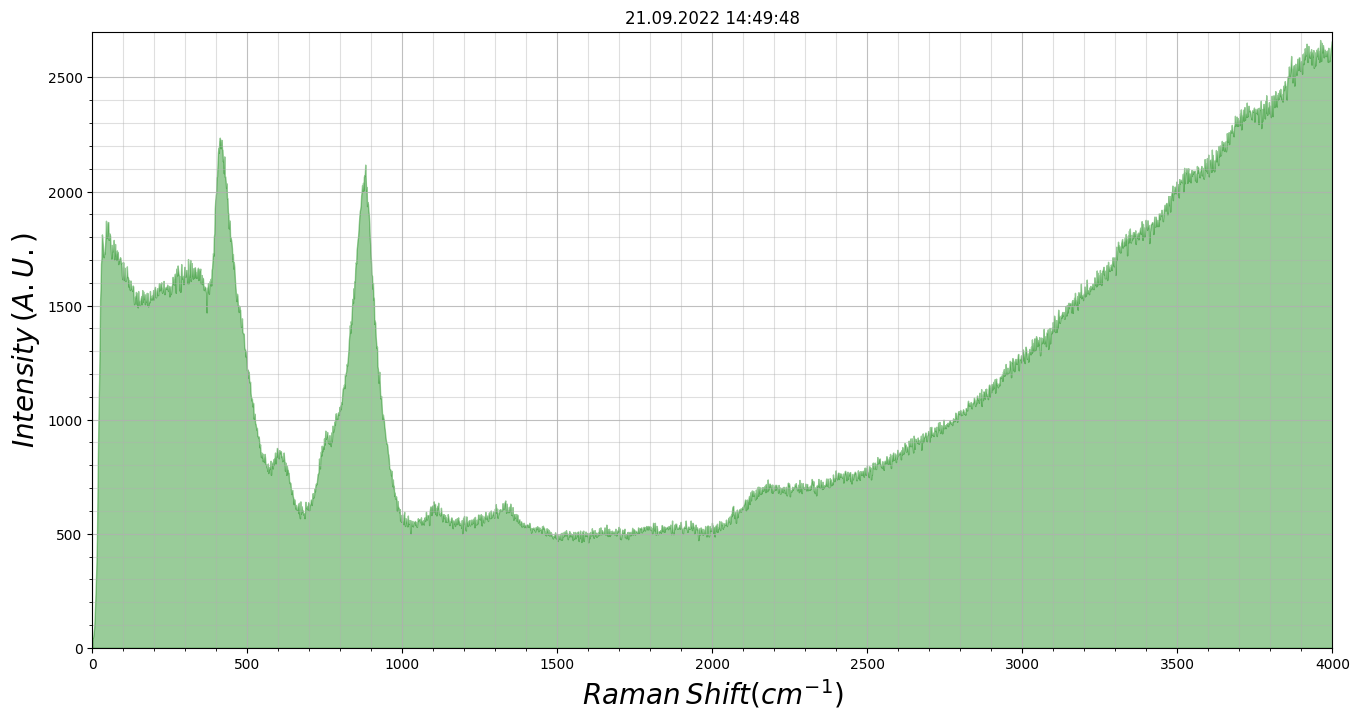

In [44]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np


with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
    fig, ax = plt.subplots()
    fig.set_size_inches(16,8)

    base = np.linspace(0,4000,2737)
    plt.fill_between(base,s.spy, color='g', alpha=0.4)

    plt.ylim([0, 2700])
    plt.xlim([0, 4000])
    plt.xlabel(r'$Raman \: Shift (cm^{-1})$', fontsize=20)
    plt.ylabel(r'$Intensity \: (A.U.)$', fontsize=20)
    ax.set_title(s.info)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 2501, 500)
    minor_ticks = np.arange(0, 2501, 100)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.4)
    ax.grid(which='major', alpha=0.8)

    ax.xaxis.set_minor_locator(MultipleLocator(100))
    plt.savefig('test.jpeg',dpi=900)